In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -U numpy
!{sys.executable} -m pip install -U scipy
!{sys.executable} -m pip install -U matplotlib

In [2]:
# Hash utilities
from pickle import TRUE
import zlib
import uuid
import statistics
from collections import Counter as count  
from string import printable  

# Create Hash Function
def crc32_hash_function(user_id: str) -> str:
    """Take string, even if its integer convert first to string"""
    return zlib.crc32(user_id.encode("utf-8"))

def modified_fnv_hash_function(user_id: str):
    p = 16777619;
    hash_int = 2166136261;
    for b in user_id.encode("utf-8"):
        hash_int = (hash_int ^ b) * p;
    hash_int += hash_int << 13;
    hash_int ^= hash_int >> 7;
    hash_int += hash_int << 3;
    hash_int ^= hash_int >> 17;
    hash_int += hash_int << 5;
    return hash_int;

# Convert from str to hexadecimal
def to_hex(crc32encoded: str) -> hex:
    return hex(crc32encoded & 0xffffffff)

# Perform hash function to each item
def distribute(items: list, num_containers: int, hash_function = hash) -> count:  
    return count([hash_function(item) % num_containers for item in items])  

# Get max values from Collections
def f_max(s): return s.most_common(1)[0][1] if s else None

def get_stats(counts: count) -> dict:
    ret = { "Mean": statistics.mean(counts.values()),
    "Median": statistics.median(counts.values()),
    "Std": statistics.stdev(counts.values()),
    "Max": f_max(counts) }
    return ret

def pretty_print(d: dict, indent=0) -> str:
    str_builder = ""
    for key, value in d.items():
        str_builder += f"{key}: {value} "
    return str_builder

def textbox_print(d: dict) -> str:
    str_builder = '\n'.join((
        r'$\mu=%.2f$' % (d['Mean'], ),
        r'$\mathrm{median}=%.2f$' % (d['Median'], ),
        r'$\sigma=%.2f$' % (d['Std'], ),
        r'$\max=%.2f$' % (d['Max'], )))
    return str_builder

# Cli plotting
def plot(histogram):  
    for key in sorted(histogram):  
        count1 = histogram[key]  
        padding = (max(histogram.values()) - count1) * " "  
        print(f"{key:3} {'■' * count1}{padding} ({count1})")

def get_title(algorithm_name, num_bins, num_elements, num_case, extra=None, deco=False):
        str_builder = ""
        if not num_case:
            str_builder += f"{algorithm_name}"
        else:
            if deco:
                str_builder += ":.:.:.:.:.: "
            str_builder += f"Use Case #{num_case} - {algorithm_name}"
        str_builder += f"\nNumber of Bins: {num_bins}  Number of UUIDs: {num_elements}"
        if extra:
            return f"{str_builder}\n{extra}"
        return str_builder

# Quick demo with 5 bins
bins = 5

counts = distribute(printable, num_containers=bins)
stats = get_stats(counts)
print(get_title(sys.hash_info.algorithm, bins, len(printable), 1, pretty_print(stats), True))
plot(counts)

counts = distribute(printable, num_containers=bins, hash_function=crc32_hash_function)
stats = get_stats(counts)
print(get_title("crc32", bins, len(printable), 2, pretty_print(stats), True))
plot(counts)

counts = distribute(printable, num_containers=bins, hash_function=modified_fnv_hash_function)
stats = get_stats(counts)
print(get_title("fnv modified", bins, len(printable), 3, pretty_print(stats), True))
plot(counts)

:.:.:.:.:.: Use Case #1 - siphash24
Number of Bins: 5  Number of UUIDs: 100
Mean: 20 Median: 24 Std: 8.031189202104505 Max: 27 
  0 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■  (26)
  2 ■■■■■■■■■■■■■■              (14)
  3 ■■■■■■■■■                   (9)
  4 ■■■■■■■■■■■■■■■■■■■■■■■■    (24)
:.:.:.:.:.: Use Case #2 - crc32
Number of Bins: 5  Number of UUIDs: 100
Mean: 20 Median: 19 Std: 4.358898943540674 Max: 27 
  0 ■■■■■■■■■■■■■■■             (15)
  1 ■■■■■■■■■■■■■■■■■■■■        (20)
  2 ■■■■■■■■■■■■■■■■■■■         (19)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  4 ■■■■■■■■■■■■■■■■■■■         (19)
:.:.:.:.:.: Use Case #3 - fnv modified
Number of Bins: 5  Number of UUIDs: 100
Mean: 20 Median: 22 Std: 5.612486080160912 Max: 26 
  0 ■■■■■■■■■■■                (11)
  1 ■■■■■■■■■■■■■■■■■■■        (19)
  2 ■■■■■■■■■■■■■■■■■■■■■■     (22)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■ (26)
  4 ■■■■■■■■■■■■■■■■■■■■■■     (22)


In [3]:
# Low user test case
test_cases = [
    [str(uuid.uuid4().int) for i in range(10)],   
    [str(uuid.uuid4().int) for i in range(100)], 
    [str(uuid.uuid4().int) for i in range(1000)] 
]

# Arbitrary bin sizes
num_bins = [2, 5, 10]

# Demonstrate low users use case
step_counter = 0
for val in test_cases:
    for bin_size in num_bins:
        step_counter+=1

        counts = distribute(printable, num_containers=bins)
        stats = get_stats(counts)
        print(get_title(sys.hash_info.algorithm, bins, len(printable), step_counter, pretty_print(stats), True))
        plot(counts)

        counts = distribute(printable, num_containers=bins, hash_function=crc32_hash_function)
        stats = get_stats(counts)
        print(get_title("crc32", bins, len(printable), step_counter, pretty_print(stats), True))
        plot(counts)

        counts = distribute(printable, num_containers=bins, hash_function=modified_fnv_hash_function)
        stats = get_stats(counts)
        print(get_title("fnv modified", bins, len(printable), step_counter, pretty_print(stats), True))
        plot(counts)

:.:.:.:.:.: Use Case #1 - siphash24
Number of Bins: 5  Number of UUIDs: 100
Mean: 20 Median: 24 Std: 8.031189202104505 Max: 27 
  0 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■  (26)
  2 ■■■■■■■■■■■■■■              (14)
  3 ■■■■■■■■■                   (9)
  4 ■■■■■■■■■■■■■■■■■■■■■■■■    (24)
:.:.:.:.:.: Use Case #1 - crc32
Number of Bins: 5  Number of UUIDs: 100
Mean: 20 Median: 19 Std: 4.358898943540674 Max: 27 
  0 ■■■■■■■■■■■■■■■             (15)
  1 ■■■■■■■■■■■■■■■■■■■■        (20)
  2 ■■■■■■■■■■■■■■■■■■■         (19)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  4 ■■■■■■■■■■■■■■■■■■■         (19)
:.:.:.:.:.: Use Case #1 - fnv modified
Number of Bins: 5  Number of UUIDs: 100
Mean: 20 Median: 22 Std: 5.612486080160912 Max: 26 
  0 ■■■■■■■■■■■                (11)
  1 ■■■■■■■■■■■■■■■■■■■        (19)
  2 ■■■■■■■■■■■■■■■■■■■■■■     (22)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■ (26)
  4 ■■■■■■■■■■■■■■■■■■■■■■     (22)
:.:.:.:.:.: Use Case #2 - siphash24
Number of Bins: 5  Number of UUI

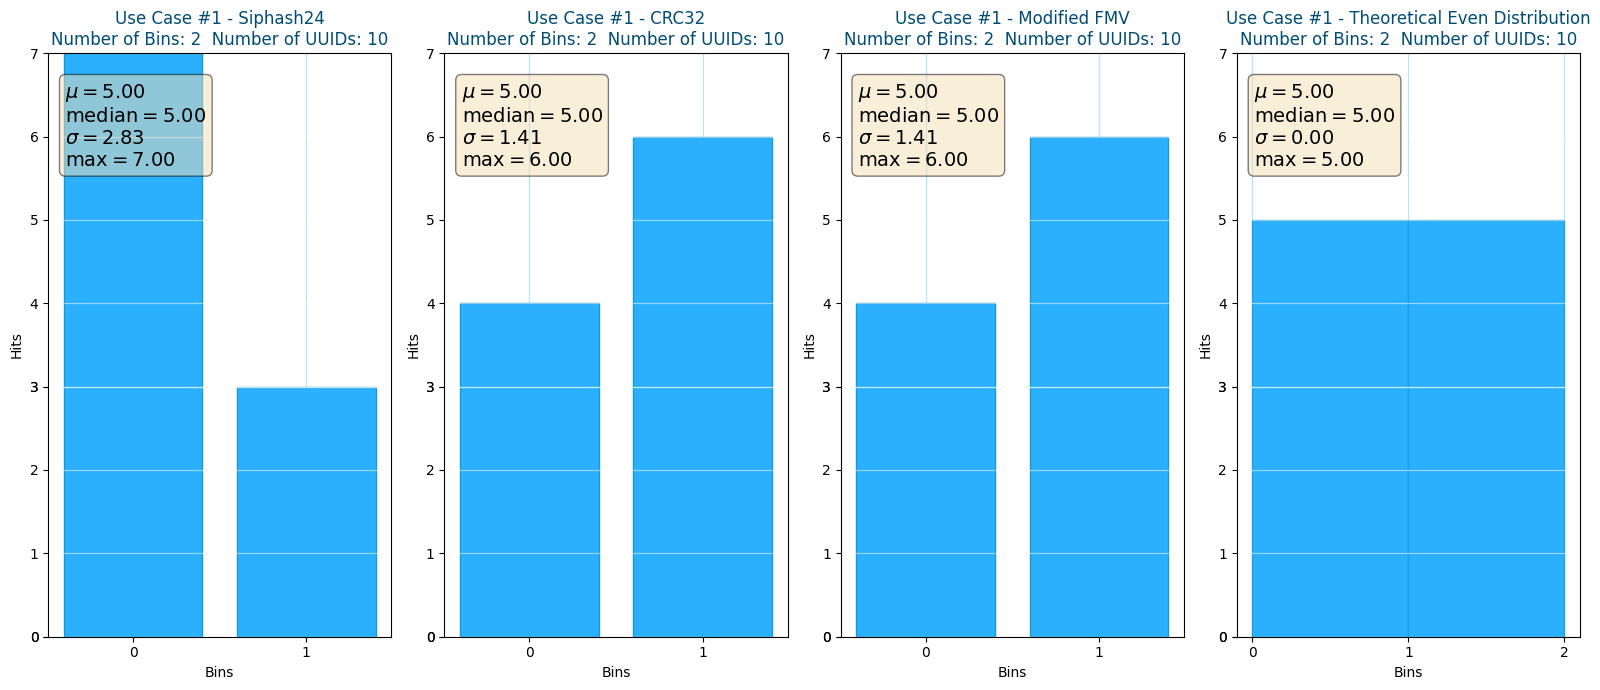

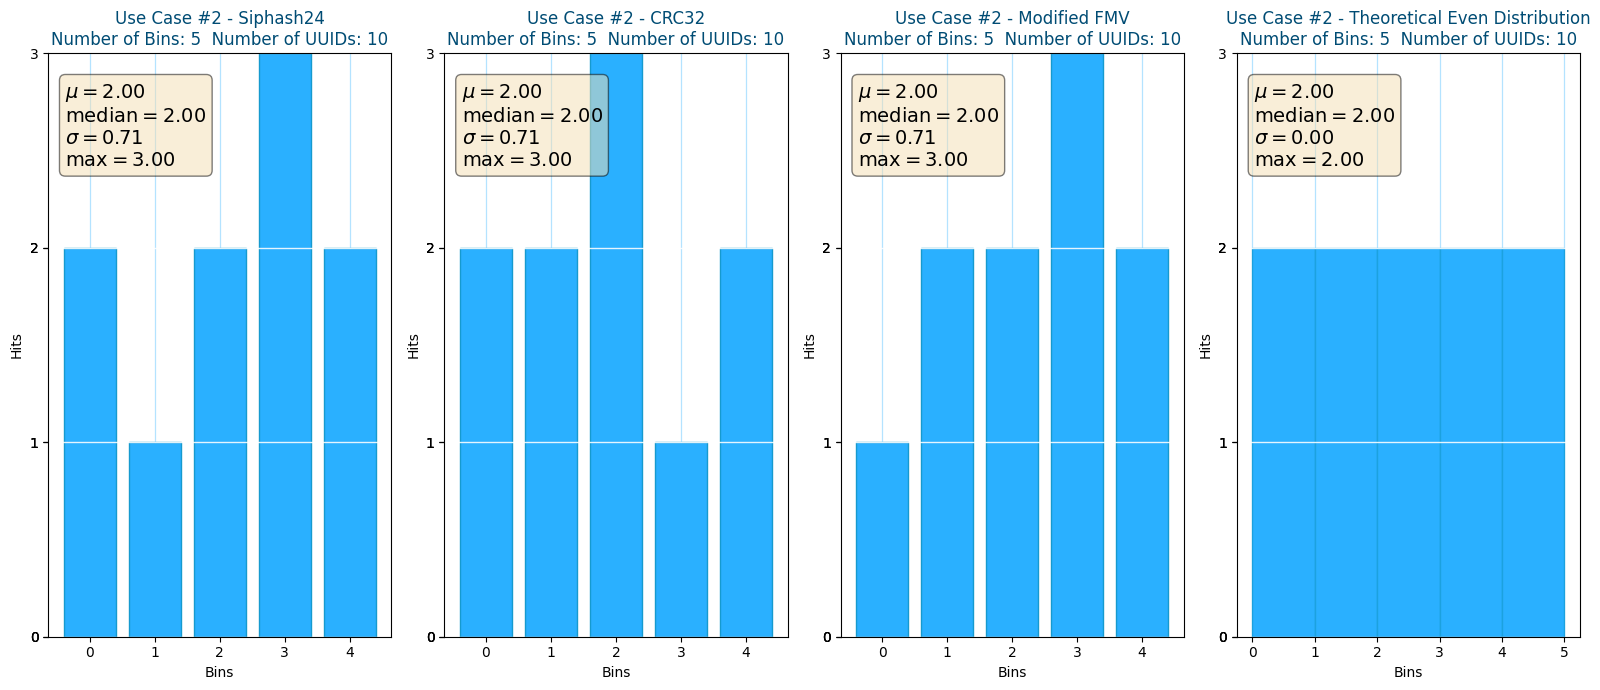

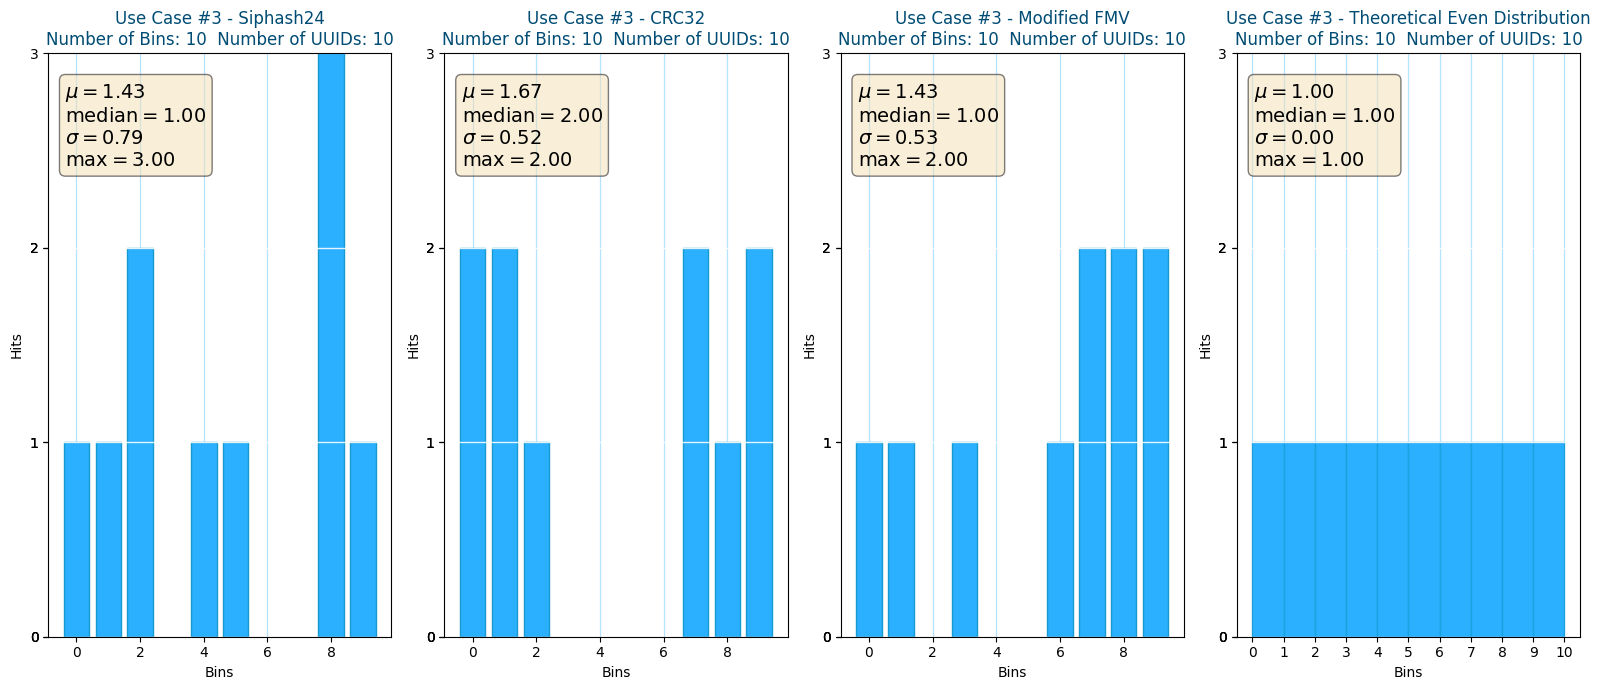

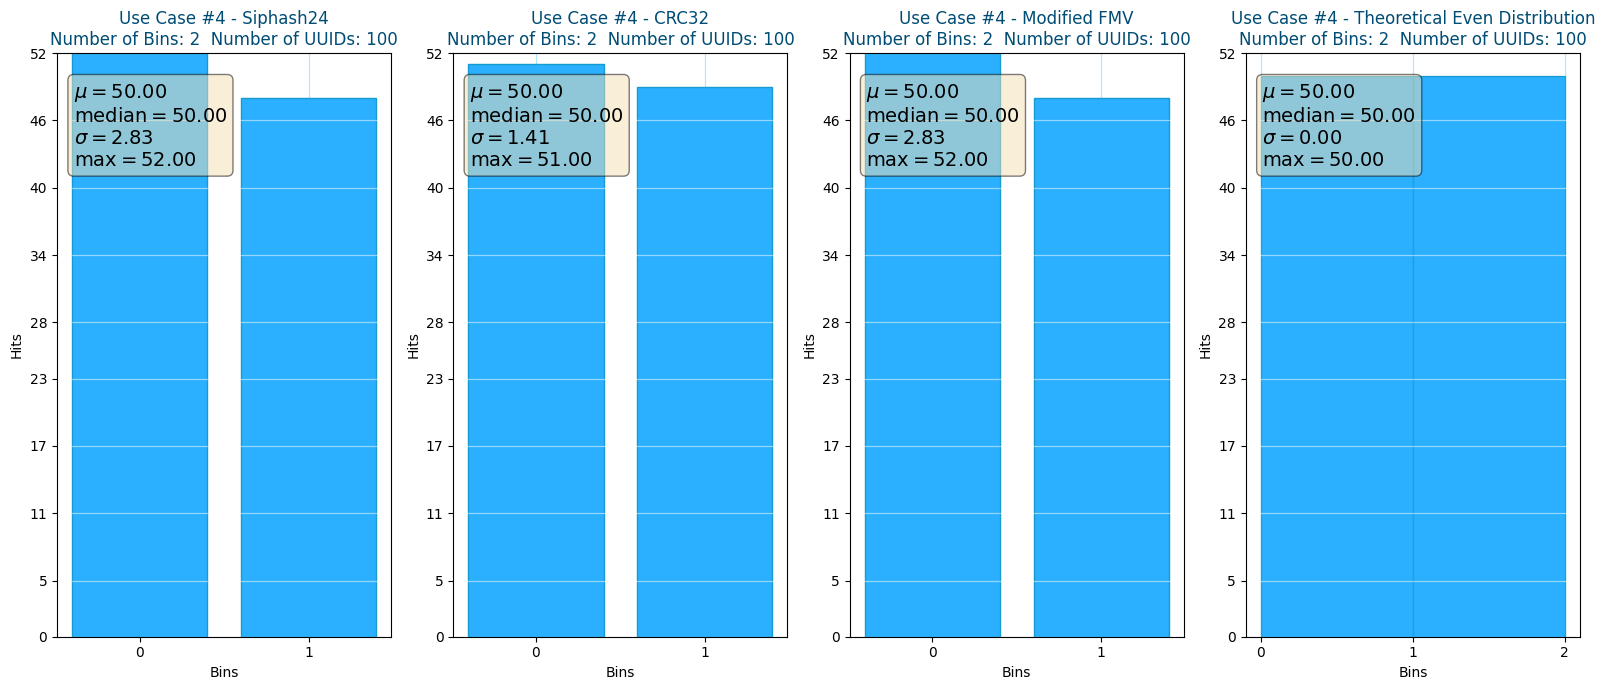

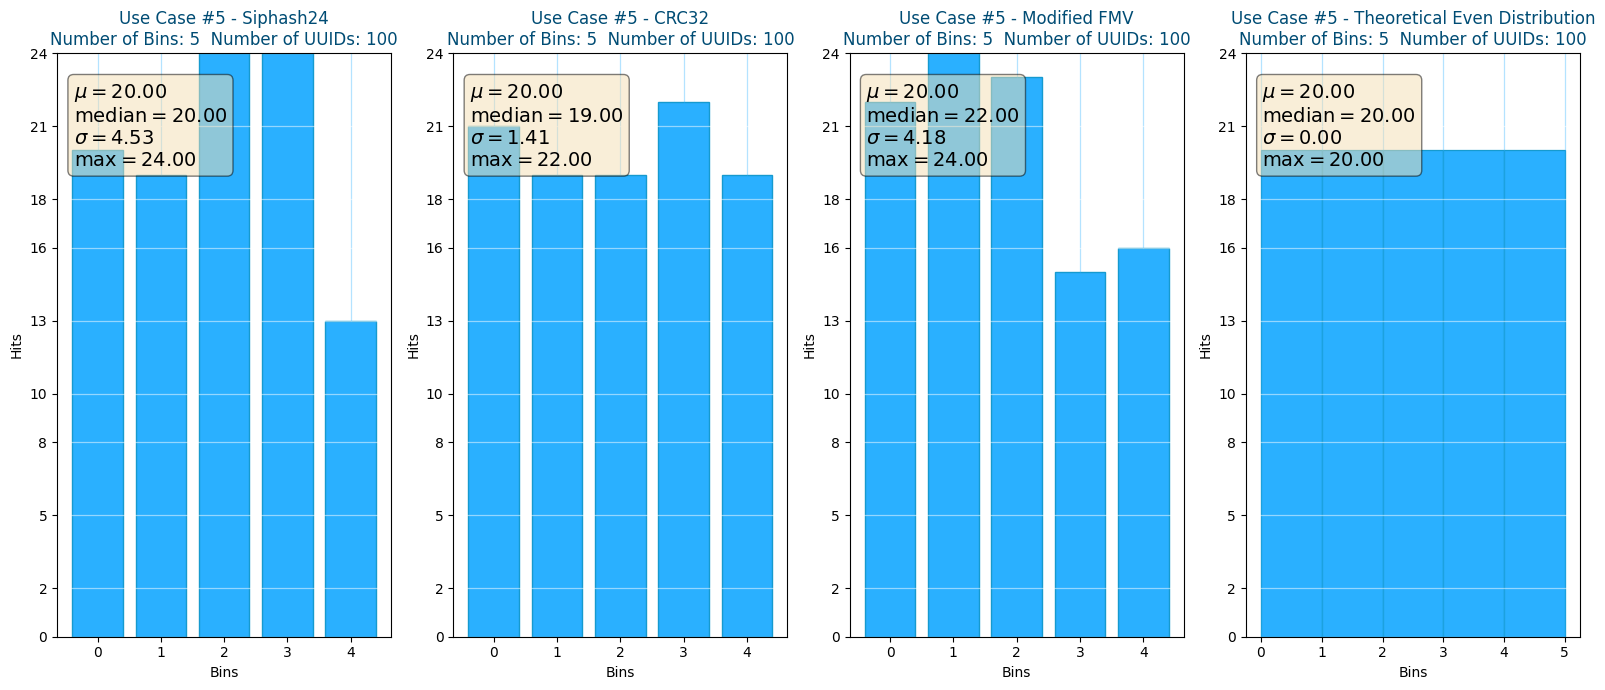

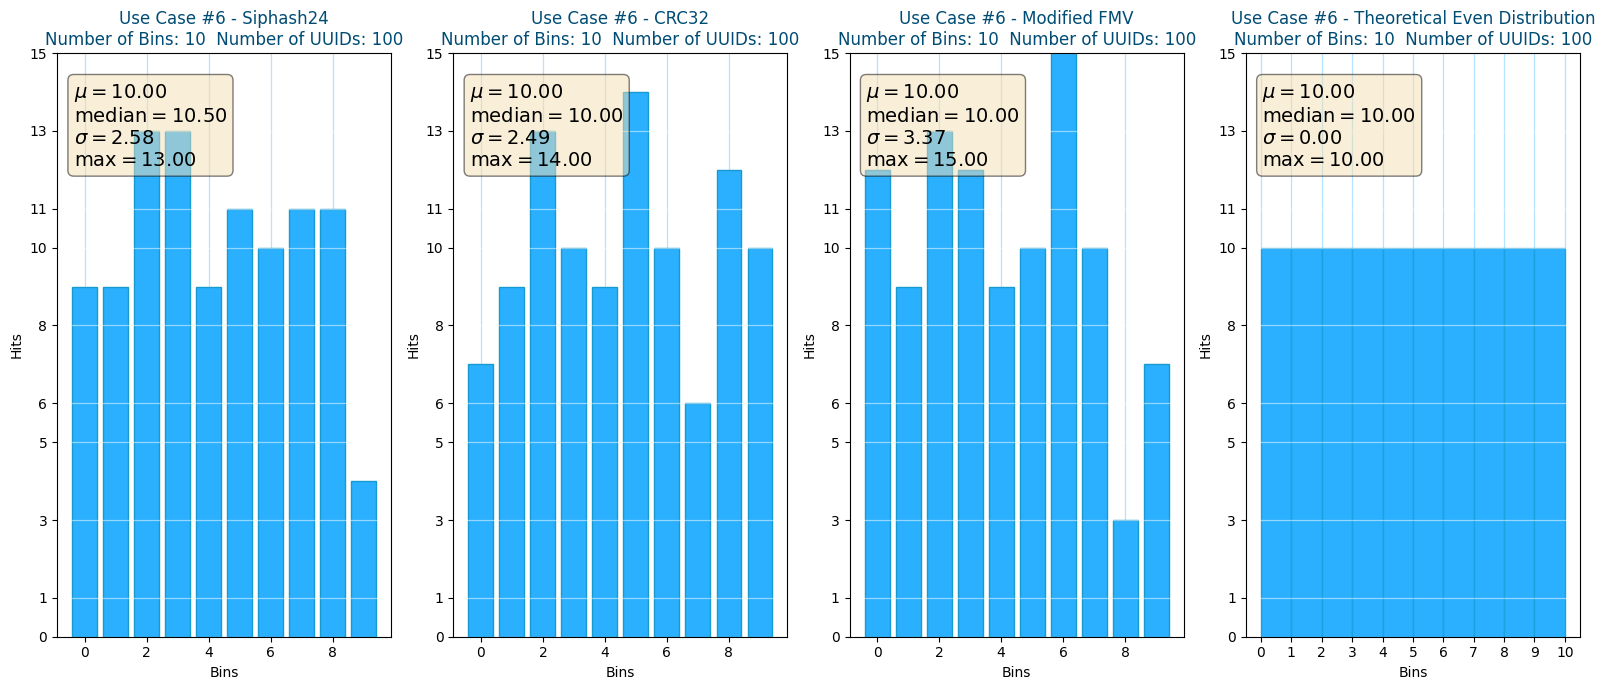

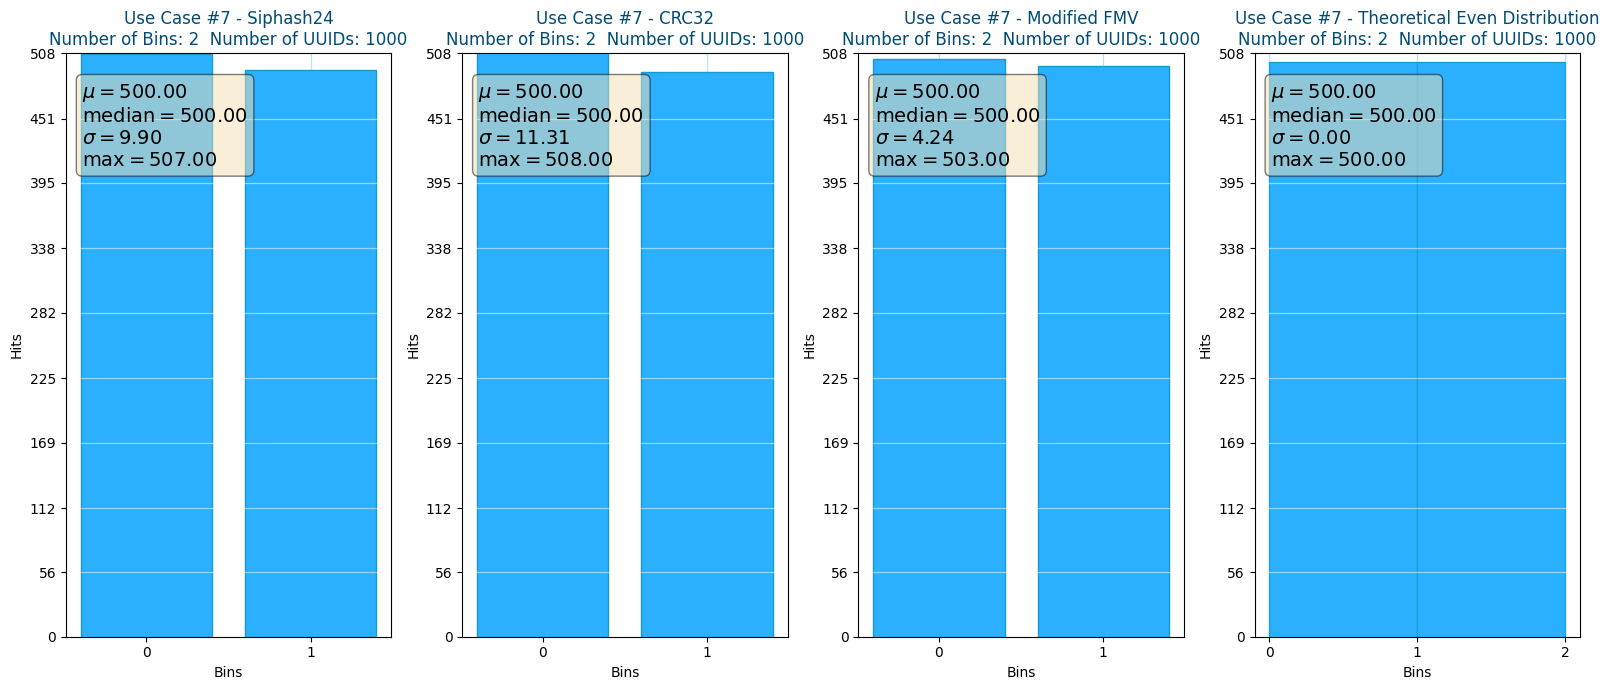

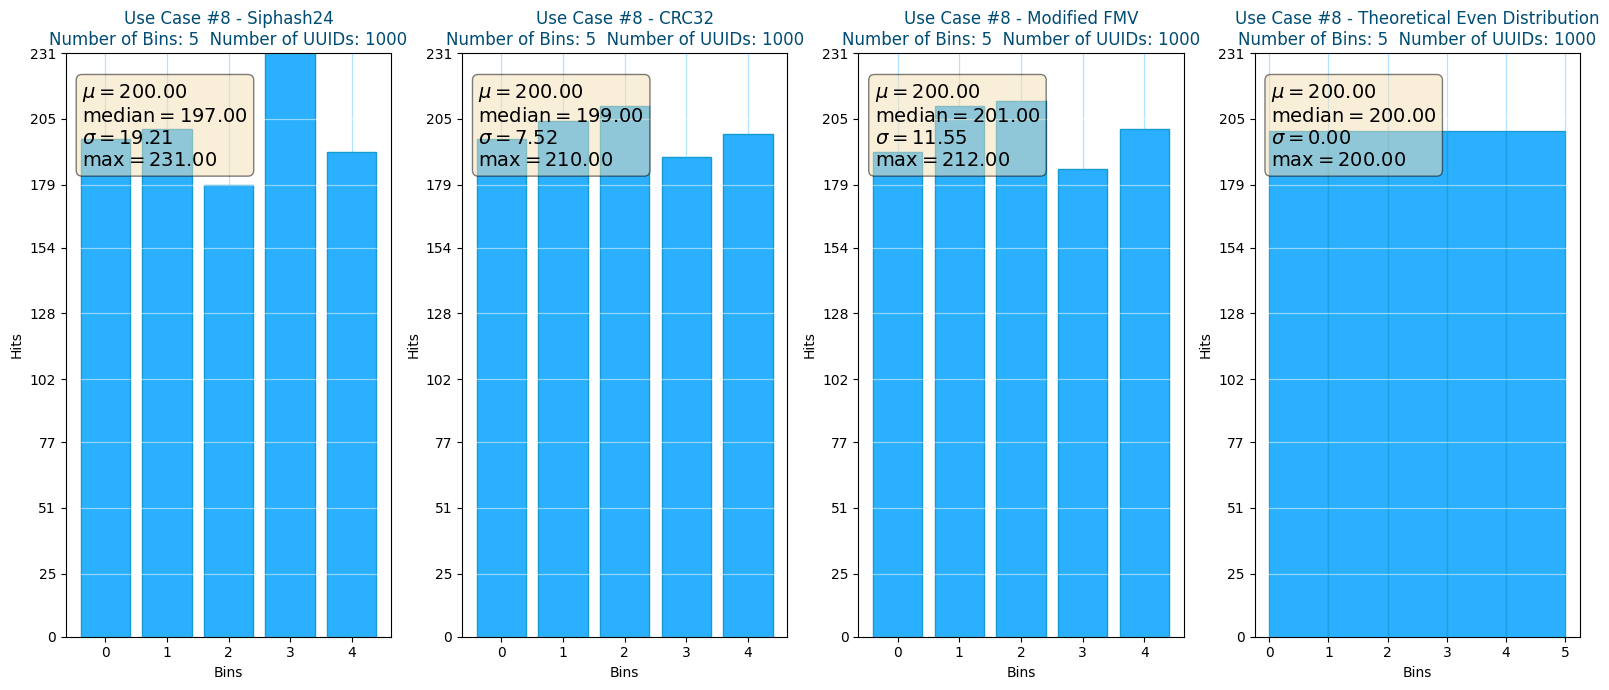

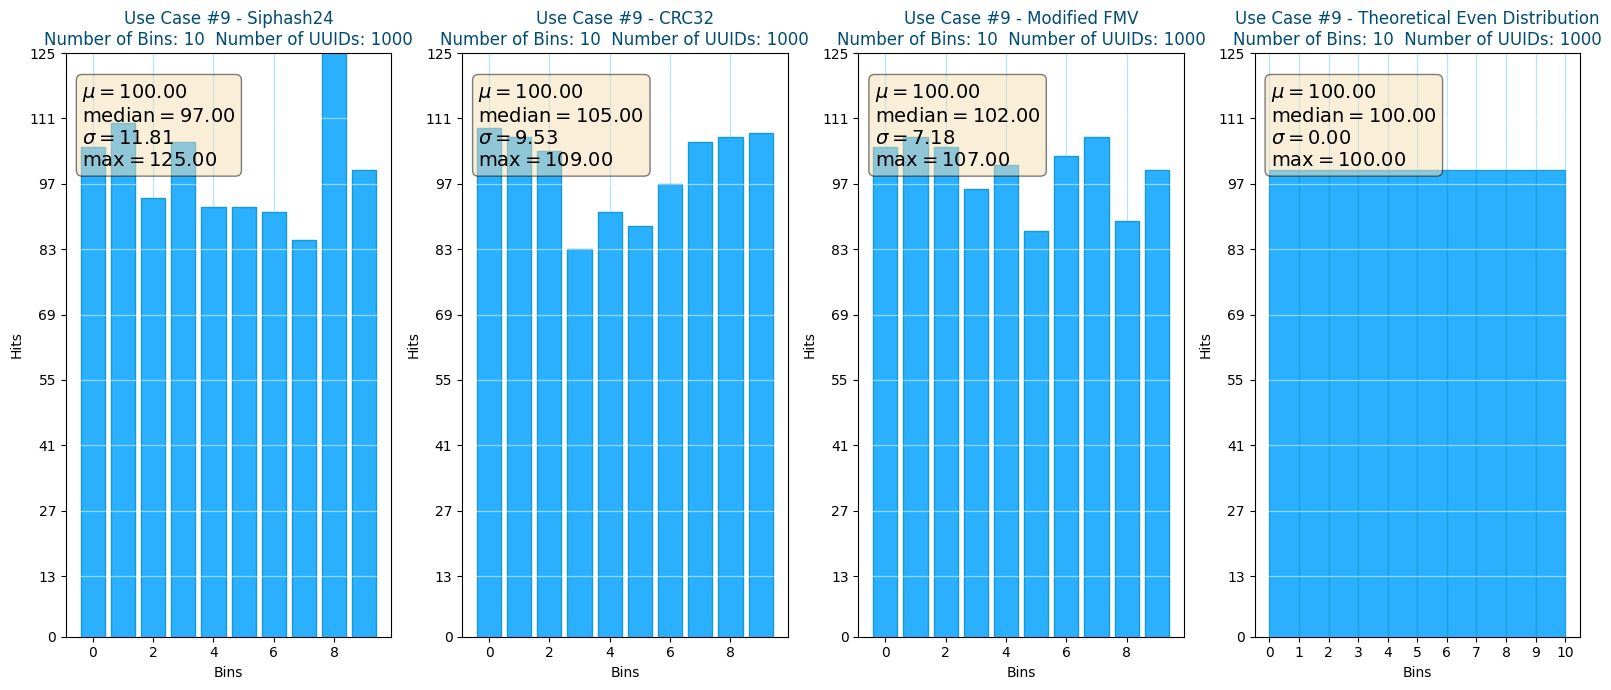

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

facecolor = '#2ab0ff'
edgecolor = '#169acf'
txt_color1 = '#252525'
txt_color2 = '#004C74'

# Low user test case
test_cases = [
    [str(uuid.uuid4().int) for i in range(10)],   
    [str(uuid.uuid4().int) for i in range(100)], 
    [str(uuid.uuid4().int) for i in range(1000)] 
]

# Arbitrary bin sizes
num_bins = [2, 5, 10]

# Demonstrate low user use case with charts
counter = 0
for val in test_cases:
    for bin_size in num_bins:
        counter+=1

        # Create 4 charts
        fig, axs = plt.subplots(1, 4, figsize=(16, 7), layout="tight")
        stats = []

        # Chart0: Default Python Algorithm
        counts = distribute(val, bin_size)
        stats.append(get_stats(counts))
        axs[0].bar(counts.keys(), counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Chart1:  CRC32 Algorithm
        counts = distribute(val, bin_size, crc32_hash_function)
        stats.append(get_stats(counts))
        axs[1].bar(counts.keys(), counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Chart2:  Modified FNV Algorithm
        counts = distribute(val, bin_size, modified_fnv_hash_function)
        stats.append(get_stats(counts))
        axs[2].bar(counts.keys(), counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Chart3: Even Distribution Histogram
        temp_uuids = [uuid.UUID(int=(int(i))) for i in val]  # Convert back to UUID
        hex_vals = [(i.hex) for i in temp_uuids]  # Convert to hexadecimal
        even_dist_count, even_dist_bins, even_dist_patches = axs[3].hist(hex_vals, bins=bin_size, facecolor=facecolor, edgecolor=edgecolor, lw=0.9)
        stats.append({ "Mean": statistics.mean(even_dist_count),
            "Median": statistics.median(even_dist_count),
            "Std": statistics.stdev(even_dist_count),
            "Max": max(even_dist_count) })

        # Get Maximum hits value to plot max y value
        hit_max_count = max([i['Max'] for i in stats])

        # Change ax for all
        for idx, ax in enumerate(axs):
            ax.grid(axis='y', color='white', lw = 0.9, alpha=0.5)
            ax.grid(axis='x', color=facecolor, lw = 0.9, alpha=0.35)
            ax.grid(True)
            ax.set_ylabel('Hits')
            ax.set_ylim([0, hit_max_count])
            ax.set_yticks(np.linspace(0, hit_max_count, num=10, dtype=int))
            ax.set_xlabel("Bins")
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, textbox_print(stats[idx]), transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

        # Change ax for chart 0
        ax = axs[0]
        ax.set_title(get_title(f"{sys.hash_info.algorithm}".capitalize(), bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 1
        ax = axs[1]
        ax.set_title(get_title("CRC32", bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 2
        ax = axs[2]
        ax.set_title(get_title("Modified FMV", bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 3
        ax = axs[3]
        ax.set_title(get_title("Theoretical Even Distribution", bin_size, len(val), counter), c=txt_color2)
        ax.set_xticks(even_dist_bins)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%1i'))
        ax.set_xticklabels(np.arange(0, len(even_dist_bins), dtype=int))
        plt.show()

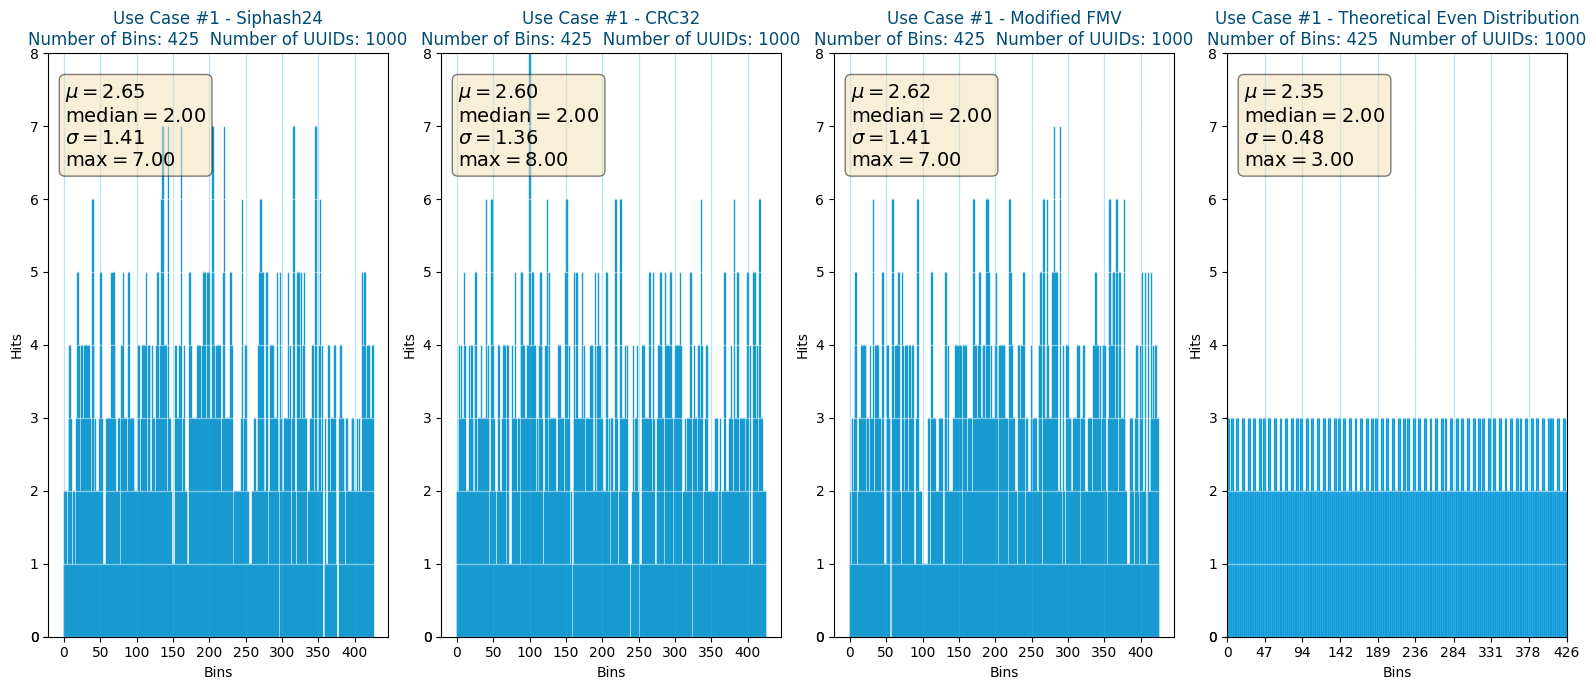

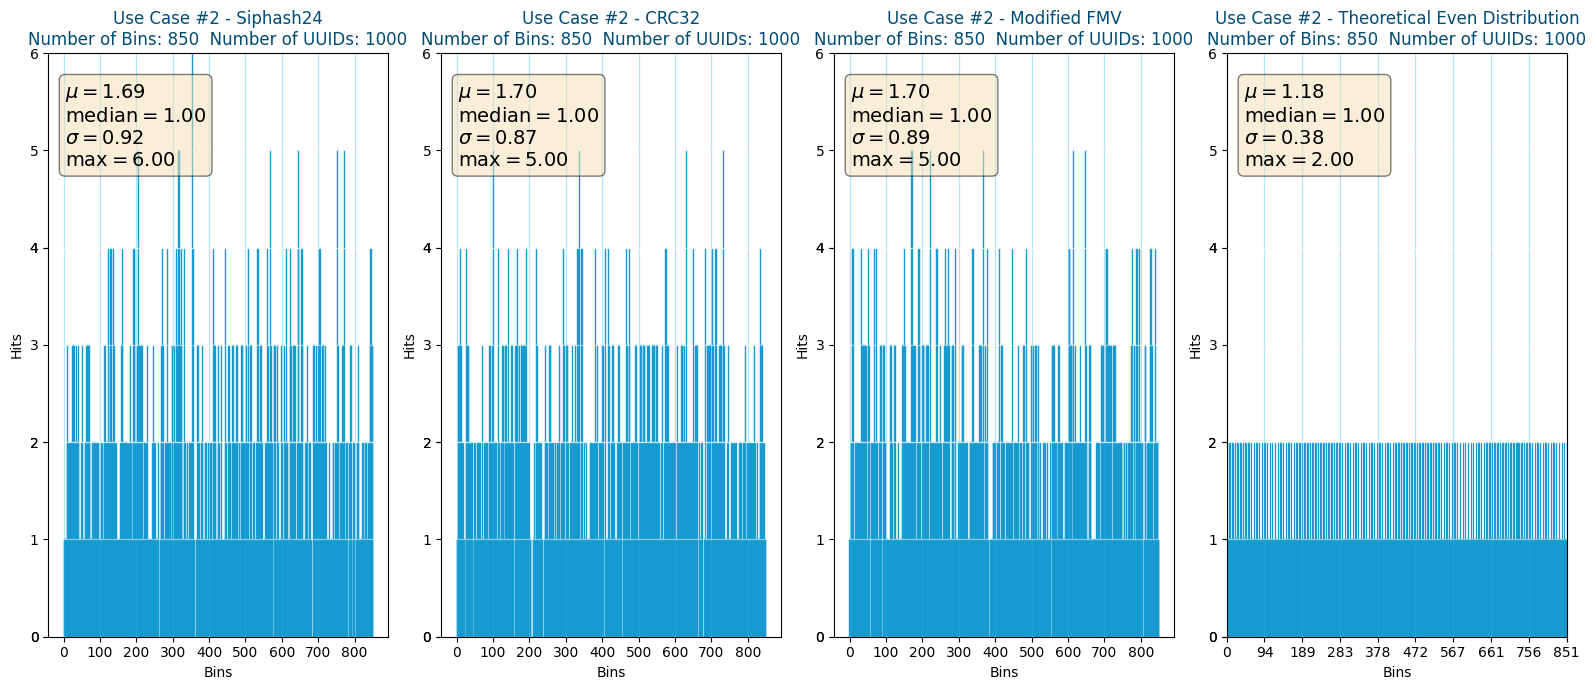

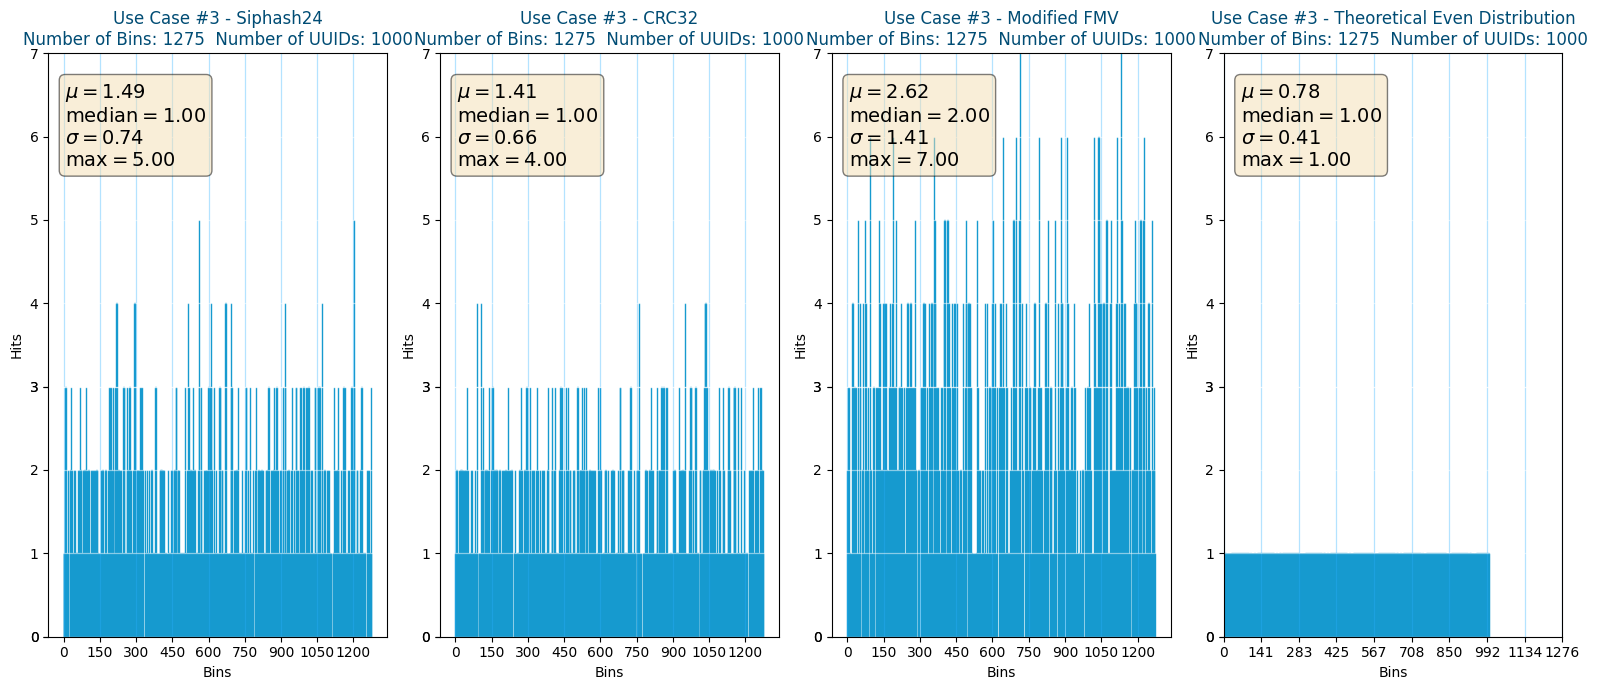

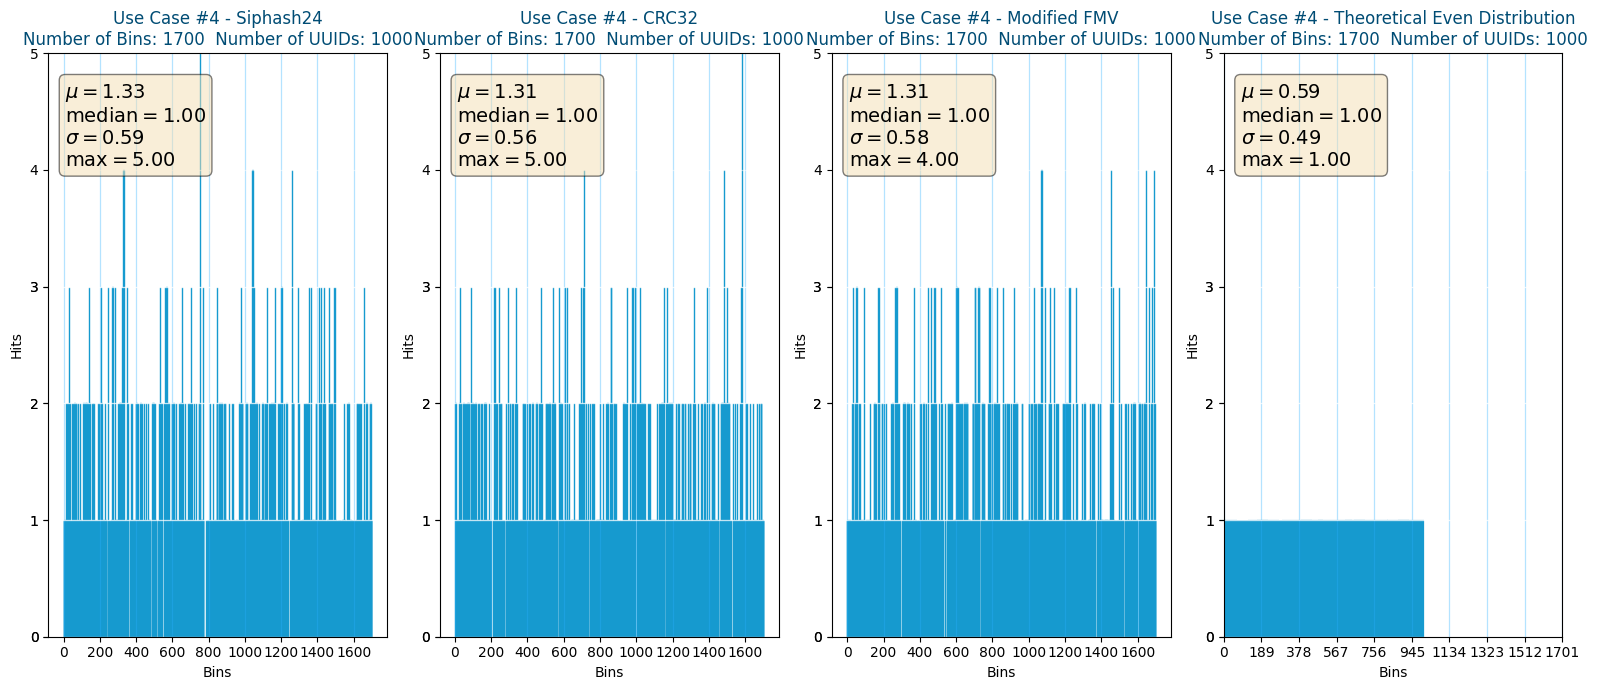

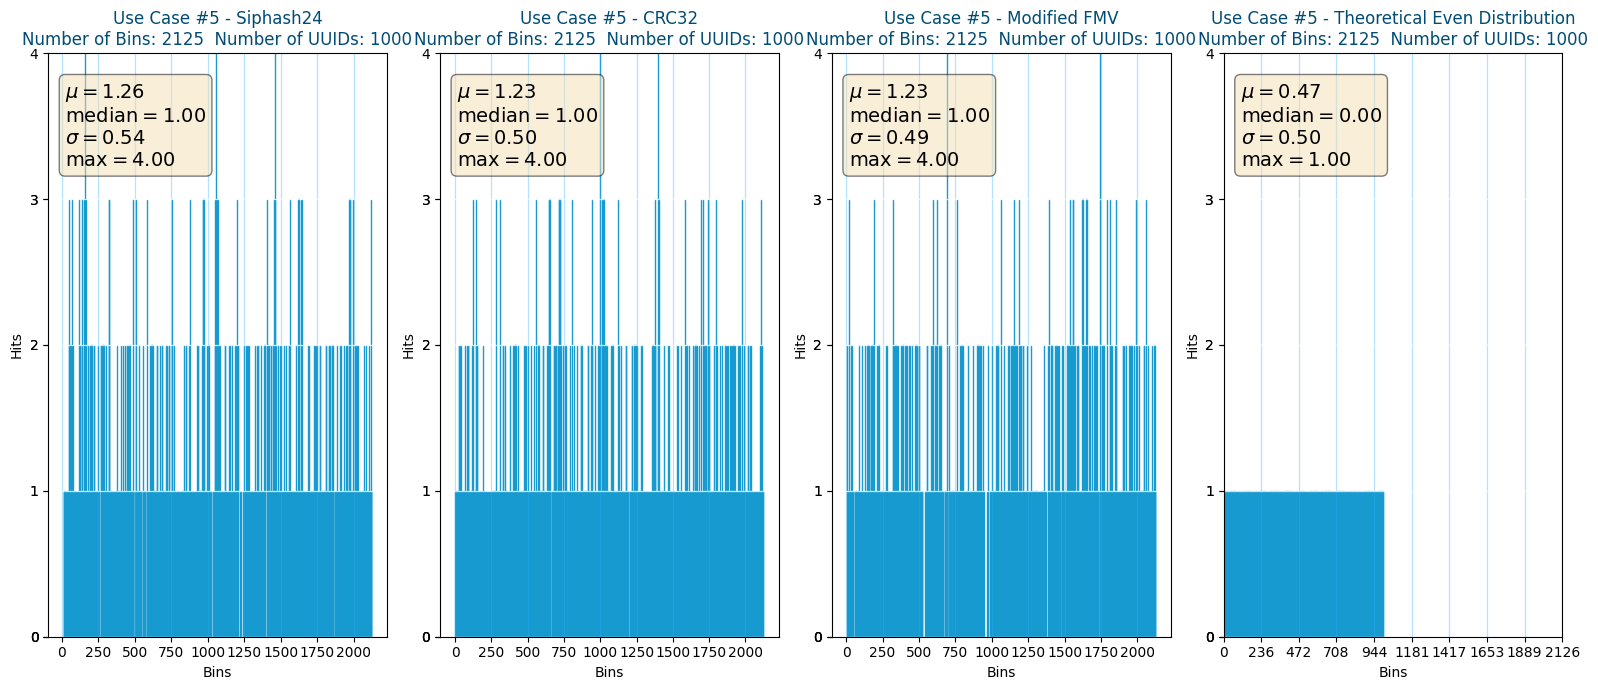

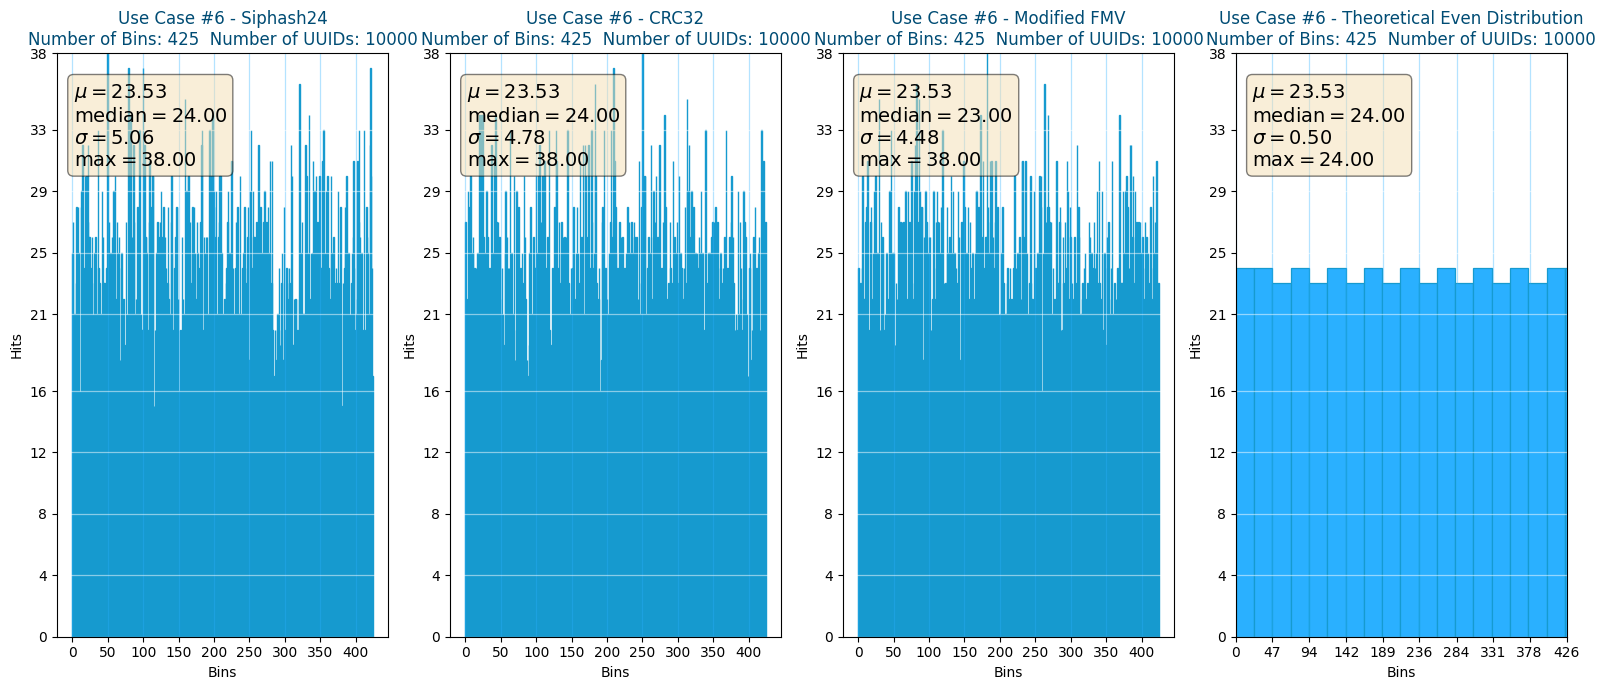

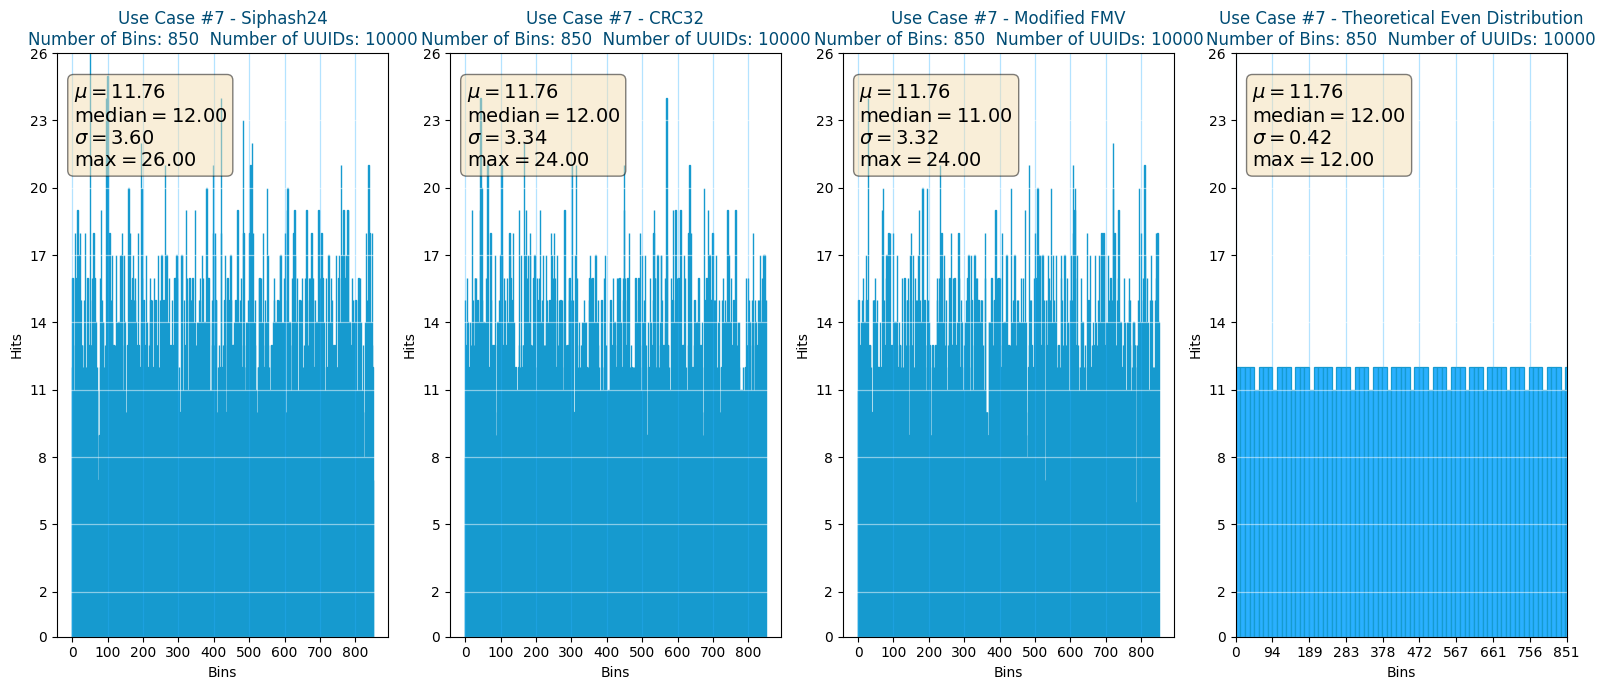

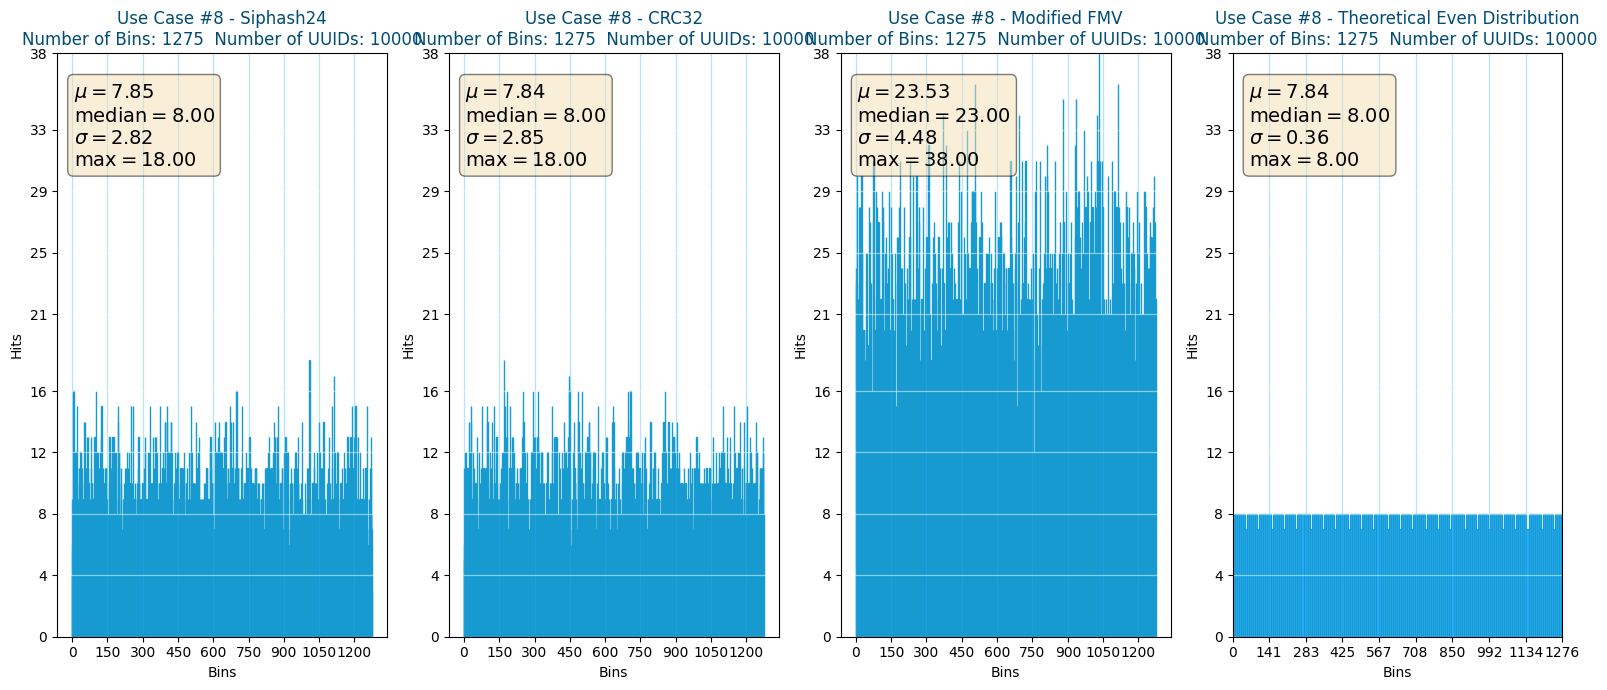

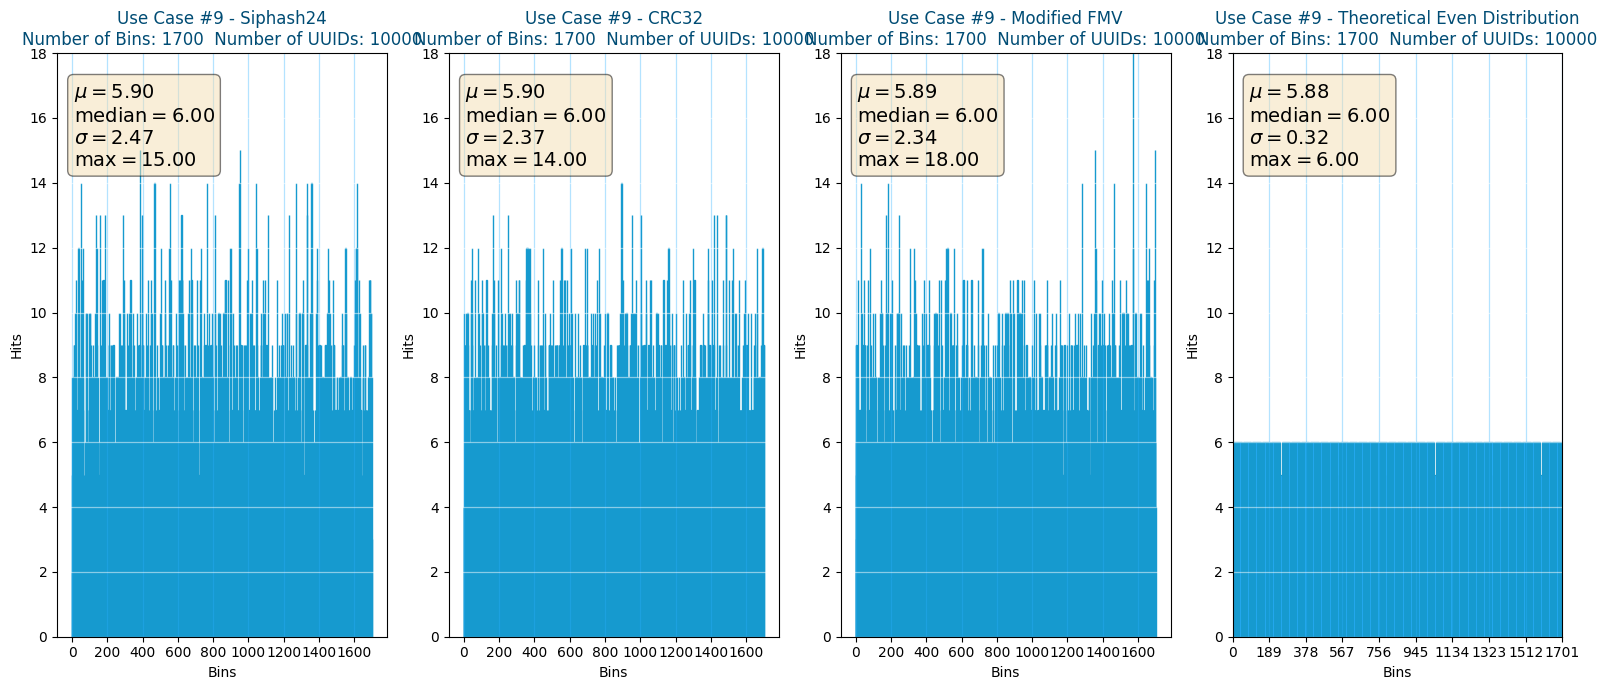

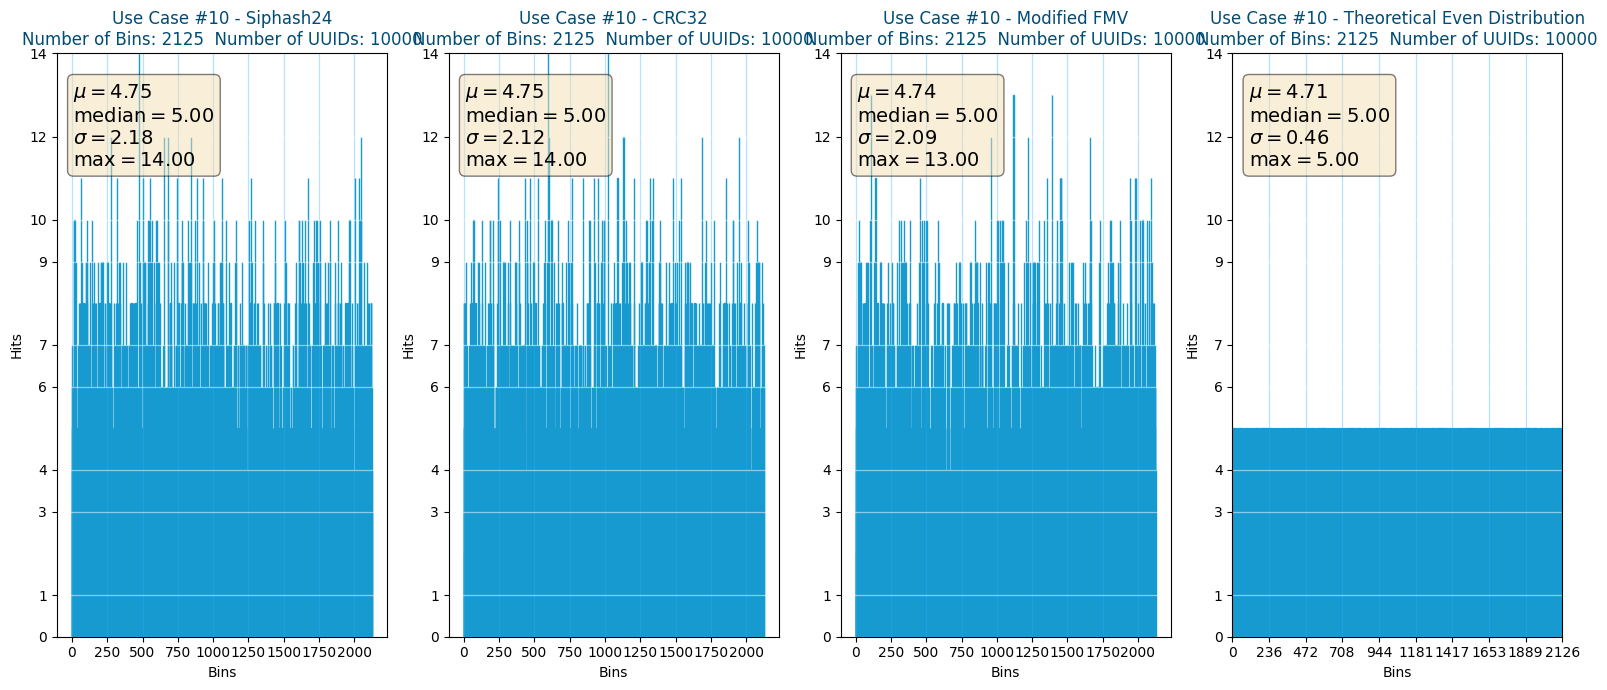

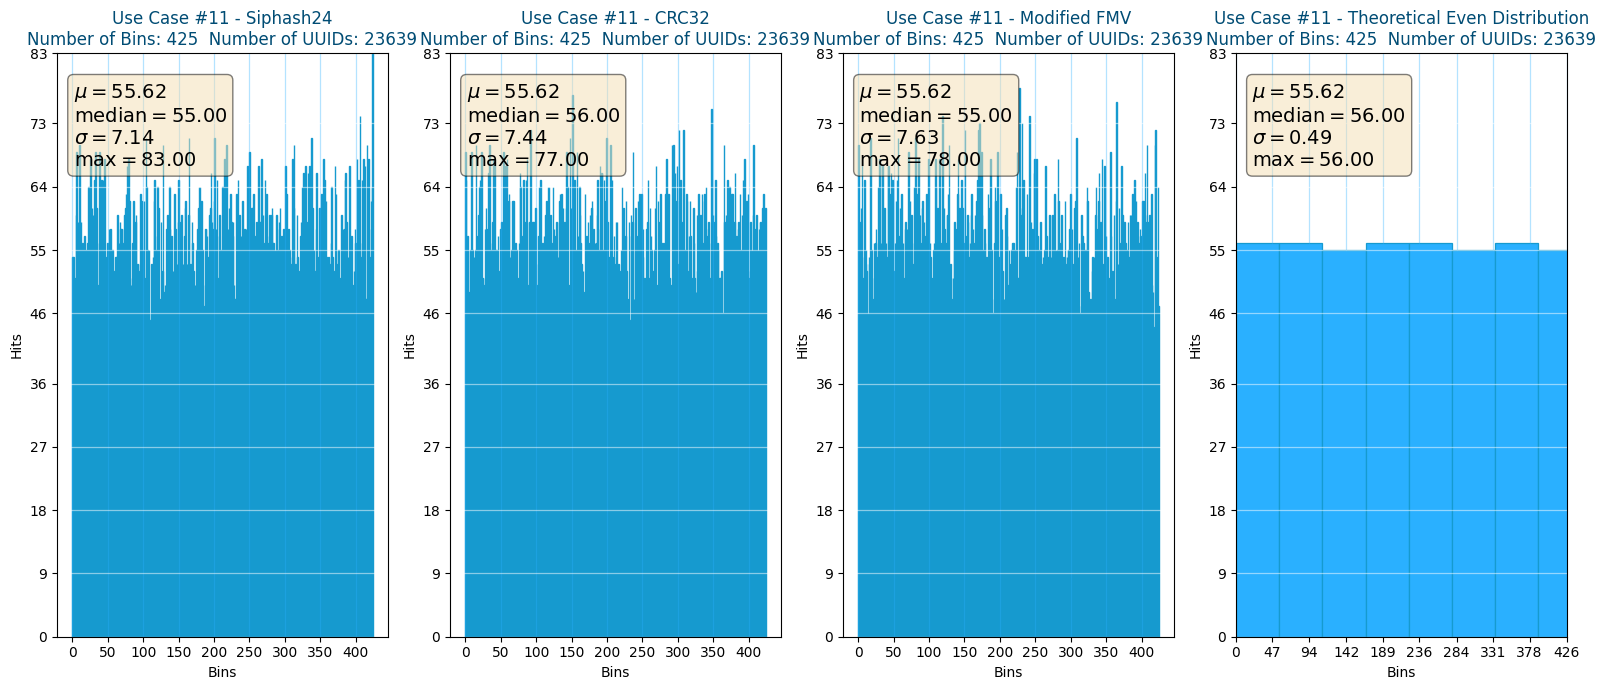

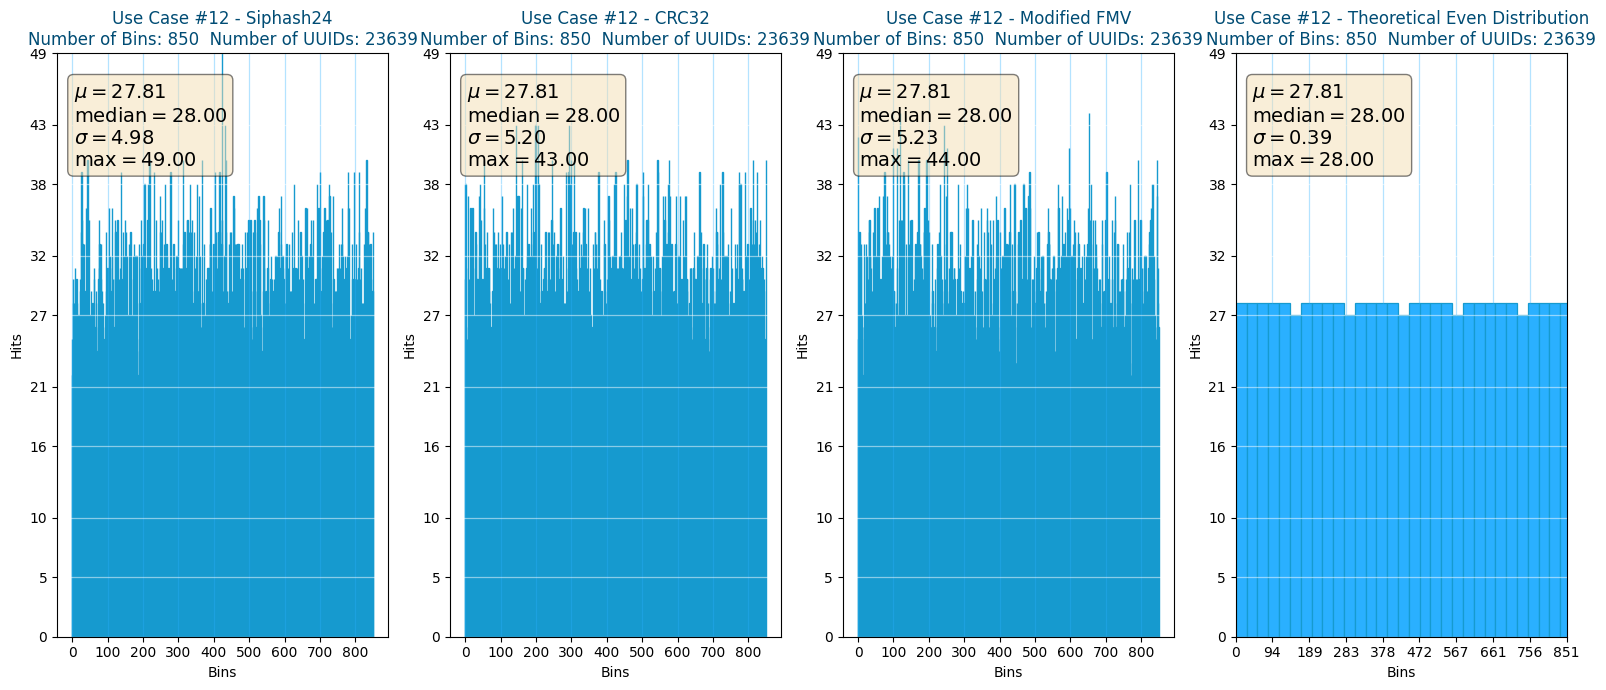

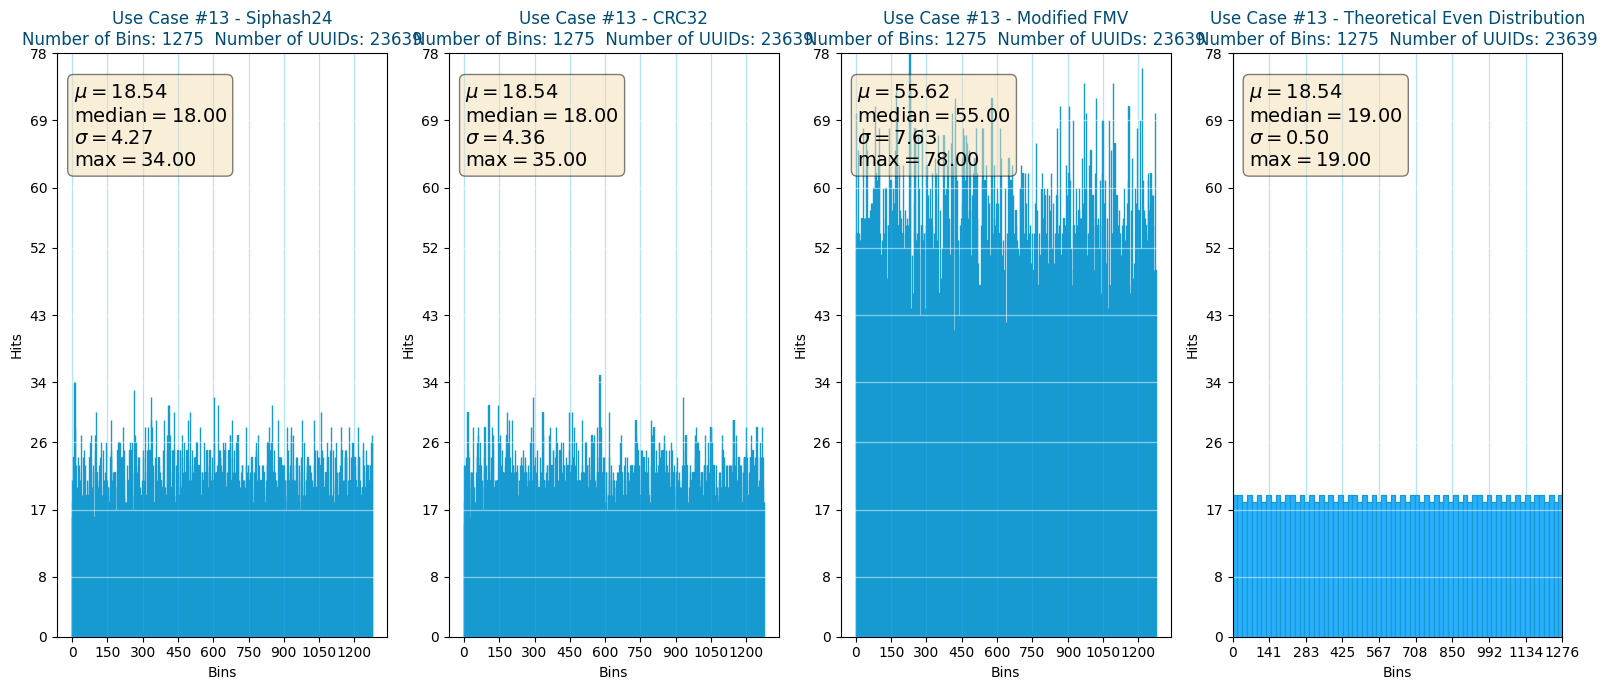

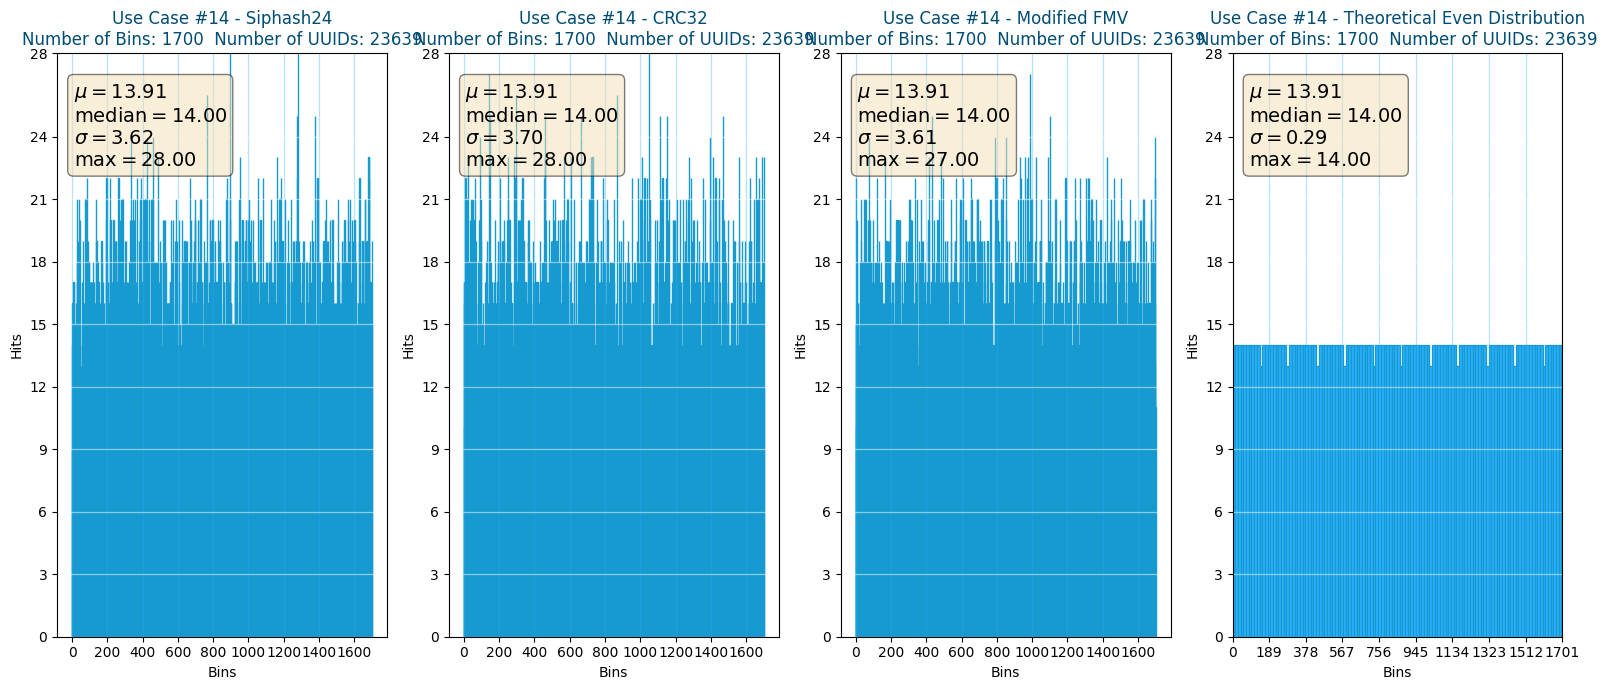

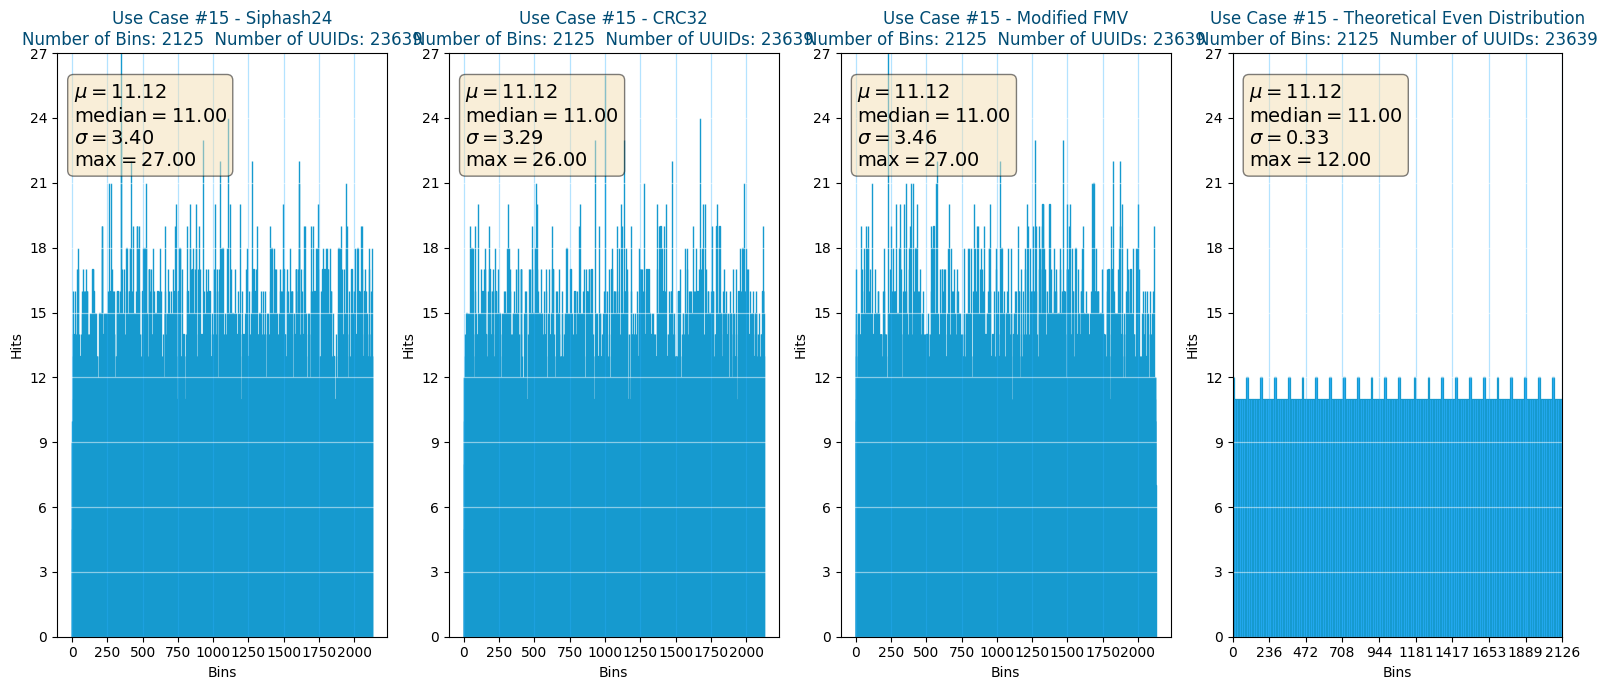

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

# Test fly-by users real life case
test_cases = [
    [str(uuid.uuid4().int) for i in range(1000)],   # 1k users
    [str(uuid.uuid4().int) for i in range(10000)],  # 10k users (client estimation)
    [str(uuid.uuid4().int) for i in range(23639)]   # 24k users (our estimation)
]

# 5% increments up to 25% of customer's MAUs
percent_incr = 0.5   # 5% increment
number_incr = 5      # 5 x 5% increments => 25%
customer_mau = 8500  # Monthly active users in 5% increments => [425, 850, 1275, 1700, 2125]
num_bins = [int((customer_mau *.10)*((i+1)*percent_incr)) for i in range(number_incr)]

# Demonstrate real-life user use case with charts
counter = 0
for val in test_cases:
    for bin_size in num_bins:
        counter+=1

        # Create 4 charts
        fig, axs = plt.subplots(1, 4, figsize=(16, 7), layout="tight")
        stats = []
        
        # Chart0: Default Python Algorithm
        counts = distribute(val, bin_size)
        stats.append(get_stats(counts))
        axs[0].bar(counts.keys(), counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Chart1:  CRC32 Algorithm
        counts = distribute(val, bin_size, crc32_hash_function)
        stats.append(get_stats(counts))
        axs[1].bar(counts.keys(), counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Chart2:  Modified FNV Algorithm
        counts = distribute(val, bin_size, modified_fnv_hash_function)
        stats.append(get_stats(counts))
        axs[2].bar(counts.keys(), counts.values(), facecolor=facecolor, edgecolor=edgecolor)

        # Chart3: Even Distribution Histogram
        temp_uuids = [uuid.UUID(int=(int(i))) for i in val]  # Convert back to UUID
        hex_vals = [(i.hex) for i in temp_uuids]  # Convert to hexadecimal
        even_dist_count, even_dist_bins, even_dist_patches = axs[3].hist(hex_vals, bins=bin_size, facecolor=facecolor, edgecolor=edgecolor, lw=0.9)
        stats.append({ "Mean": statistics.mean(even_dist_count),
            "Median": statistics.median(even_dist_count),
            "Std": statistics.stdev(even_dist_count),
            "Max": max(even_dist_count) })

        # Get Maximum hits value to plot max y value
        hit_max_count = max([i['Max'] for i in stats])

        # Change ax for all
        for idx, ax in enumerate(axs):
            ax.grid(axis='y', color='white', lw = 0.9, alpha=0.5)
            ax.grid(axis='x', color=facecolor, lw = 0.9, alpha=0.35)
            ax.grid(True)
            ax.set_ylabel('Hits')
            ax.set_ylim([0, hit_max_count])
            ax.set_yticks(np.linspace(0, hit_max_count, num=10, dtype=int))
            ax.set_xlabel("Bins")
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, textbox_print(stats[idx]), transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

        # Change ax for chart 0
        ax = axs[0]
        ax.set_title(get_title(f"{sys.hash_info.algorithm}".capitalize(), bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 1
        ax = axs[1]
        ax.set_title(get_title("CRC32", bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 2
        ax = axs[2]
        ax.set_title(get_title("Modified FMV", bin_size, len(val), counter), c=txt_color2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Change ax for chart 3
        ax = axs[3]
        ax.set_title(get_title("Theoretical Even Distribution", bin_size, len(val), counter), c=txt_color2)
        ax.set_xlim([0, bin_size])
        ax.set_xticks(np.linspace(0, len(even_dist_bins), num=10, dtype=int))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%1i'))
        ax.set_xticklabels(np.linspace(0, len(even_dist_bins), num=10, dtype=int))
        plt.show()